## Import and Format Data

The data folder is structured as below:

```
--data
    -- month_1
        -- data_file_for_day_1
        -- data_file_for_day_2
        .
        .
    -- month_2
        -- data_file_for_day_1
        -- data_file_for_day_2
        .
        .
    .
    .
    -- month_12
        -- data_file_for_day_1
        -- data_file_for_day_2
        .
        .
```

In this code, a separate dataframe is created for each month where the columns are height, temperature_of_day_1, temperature_of_day_2, and so and and the final column as average temperature for a height across all days of the month.

These dataframes for each month are stored inside the dictionary `month_dfs`, whose key is abbreviation for a month and value is the corresponding table (or dataframe) mentioned as above.

In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
# if output folder does not exist, create it
directory = './output'
if not os.path.exists(directory):
    os.makedirs(directory)

In [3]:
data_dir = "./data" # path to data directory
month_dfs = {} # dictionary to store dataframe for each month

for month_dir in os.listdir(data_dir): # find all folders for each month
    month_dir_path = os.path.join(data_dir, month_dir) # get path to each month folder
    month_name = "".join([x for x in month_dir if not x.isdigit()]) # extract only the name of the month

    data_files = os.listdir(month_dir_path) # find all data files for a month
    data_files = sorted(data_files, key=lambda x: int(x[7:])) # sort data_files according to day
    
    for i, day_file in enumerate(data_files): 
        day_file_path = os.path.join(month_dir_path, day_file) # get path to each data file containing data for each day
        day = "".join([x for x in day_file if x.isdigit()]) # get the day number
        
        df = pd.read_csv(day_file_path, sep="  ", header=None,
                         names=['height', f'temperature_{day}']) # read the files, the files contain no header,
                                                                # thus the columns are given names manually, 
                                                                # It was found that there were two spaces between data of
                                                                # two columns thus sep was set to "  ".

        if i == 0:
            month_df = df
        else:
            month_df = pd.merge(month_df, df, on='height') # join the dataframes on basis of height

    # extract column names for temperatures
    month_df_columns = month_df.columns
    temperature_columns = [x for x in month_df_columns if 'temperature' in x]
    
    # get average temperature at a given height for the month
    month_df['avg_temperature'] = month_df[temperature_columns].mean(axis=1)
    
    month_dfs[month_name] = month_df # add the dataframe to the dictionary
        

/home/lenovo/miniconda3/envs/manisha/lib/python3.6/site-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


In [4]:
month_dfs["apr"] # sample element of the dictionary

,height,temperature_1,temperature_2,temperature_3,temperature_4,temperature_5,temperature_6,temperature_7,temperature_8,temperature_9,...,temperature_22,temperature_23,temperature_24,temperature_25,temperature_26,temperature_27,temperature_28,temperature_29,temperature_30,avg_temperature
0,0.0,293.8,293.8,293.8,293.9,293.9,294.0,294.0,294.1,294.1,...,294.7,294.8,294.8,294.9,294.9,295.0,295.0,295.1,295.1,294.423333
1,0.5,291.3,291.4,291.4,291.4,291.5,291.5,291.6,291.6,291.7,...,292.3,292.3,292.4,292.4,292.5,292.5,292.6,292.6,292.7,291.970000
2,1.0,288.8,288.8,288.8,288.9,288.9,289.0,289.0,289.0,289.1,...,289.7,289.7,289.8,289.8,289.9,289.9,290.0,290.0,290.1,289.390000
3,1.5,286.1,286.1,286.1,286.2,286.2,286.3,286.3,286.4,286.4,...,287.0,287.1,287.1,287.2,287.2,287.3,287.3,287.4,287.4,286.716667
4,2.0,283.3,283.3,283.4,283.4,283.4,283.5,283.5,283.6,283.6,...,284.3,284.3,284.4,284.4,284.5,284.5,284.6,284.6,284.7,283.956667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,118.0,351.1,350.2,349.4,348.8,349.8,348.4,354.6,349.9,349.3,...,351.6,355.3,353.6,356.7,355.3,353.0,350.3,351.9,352.4,352.500000
237,118.5,356.9,355.8,354.8,354.1,355.2,353.5,360.6,355.1,354.4,...,356.6,360.8,358.9,362.4,360.7,358.0,355.0,356.7,357.3,357.903333
238,119.0,362.5,361.3,360.1,359.3,360.5,358.6,366.6,360.3,359.5,...,361.6,366.3,364.1,368.1,366.2,363.0,359.5,361.5,362.1,363.253333
239,119.5,368.2,366.7,365.4,364.4,365.7,363.6,372.6,365.5,364.5,...,366.5,371.8,369.3,373.7,371.5,368.0,364.1,366.3,366.9,368.566667


In [5]:
# sort the dictionary according to months
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sorted_dfs = {}
for key in months:
    sorted_dfs[key] = month_dfs[key]

## Visualize Data

### Line Plot

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

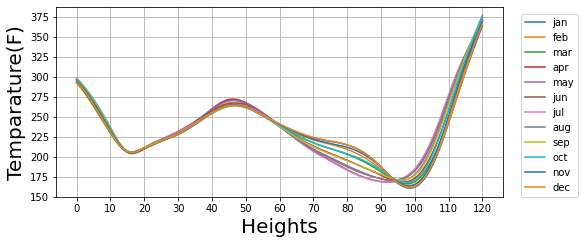

In [7]:
fig,ax = plt.subplots(1, figsize=(8,3.5))

for month, df in sorted_dfs.items():
    heights = df["height"].values
    avg_temp = df["avg_temperature"].values
    ax.plot(heights, avg_temp, label=month)
    
ax.set_xlabel("Heights", fontsize=20)
ax.set_ylabel("Temparature(F)", fontsize=20)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(25))
ax.grid()
plt.legend(loc=(1.04,0))
plt.savefig('./output/month_wise_line_plot.pdf')
plt.show()

### Contour Plot

/home/lenovo/miniconda3/envs/manisha/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/lenovo/miniconda3/envs/manisha/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(0, -20.0, '-10.0'),
 Text(0, 0.0, '0.0'),
 Text(0, 20.0, '10.0'),
 Text(0, 40.0, '20.0'),
 Text(0, 60.0, '30.0'),
 Text(0, 80.0, '40.0'),
 Text(0, 100.0, '50.0'),
 Text(0, 120.0, '60.0'),
 Text(0, 140.0, '70.0'),
 Text(0, 160.0, '80.0'),
 Text(0, 180.0, '90.0'),
 Text(0, 200.0, '100.0'),
 Text(0, 220.0, '110.0'),
 Text(0, 240.0, '120.0'),
 Text(0, 260.0, '')]

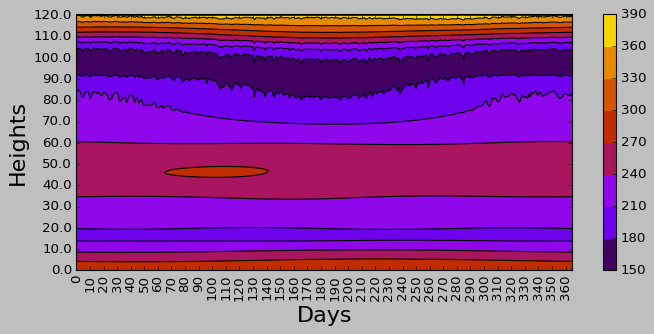

In [61]:
# get values for heights
heights = sorted_dfs['jan']['height'].values

# create a dataframe which contains temperature values for all 365 days,
# columns represent temperature for each heights and rows contain temperatures for each day
all_dfs = [val.drop(['avg_temperature','height'], 1).T for key, val in sorted_dfs.items()] # remove height and avg_temperature
                                                                                        # column and transpose each dataframes to
#                                                                                     # keep heights as columns and temperature of
                                                                                    # each day in a row
final_df = pd.concat(all_dfs) # merge all the transposed dataframes
final_df.to_csv('./output/final.csv')

# get the dataframe values as numpy matrix
all_data = final_df.to_numpy()
contour_data = all_data.T # transpose the data to plot days in x-axis of contour plot

contour_data= np.vstack((contour_data,contour_data[0])) # done from example code from rejina.ipynb, why????

plt.style.use('classic') # style from rejina.ipynb
fig,ax = plt.subplots(1, figsize=(10,4))
cs = ax.contourf(contour_data, cmap='gnuplot') # style from rejina.ipynb
fig.colorbar(cs)
ax.contour(contour_data, colors='k') # colors from rejina.ipynb

# uncomment following to set dashed lines like grid, change the ranges as per need
# ax.hlines(range(0,241, 50),0,365,linestyle='--')
# ax.vlines(range(0,365, 25),0,241,linestyle='--')

ax.set_xlabel("Days", fontsize=20)
ax.set_ylabel("Heights", fontsize=20)

ax.xaxis.set_major_locator(MultipleLocator(10)) # put ticks in x-axis for every 10 points
ax.set_xticklabels(ax.get_xticks().astype(int), rotation = 90)

# todo: write understandable code segment for following
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.set_yticklabels(np.arange(heights[0]-10, heights[-1]+1, 10))
